# Robustness to small sample sizes

for all methods

In [1]:
require('cowplot')
library('ggplot2')
source(file.path('..','commons','get_expected_pval_and_equiv_z.R'))
source(file.path('..','commons','multiplot.R'))
source(file.path('..','commons','plot_lib.R'))
source(file.path('..', 'commons','prepare_data.R'))
source(file.path('..', 'commons','plot_unit_mismatch.R'))
source(file.path('..', 'commons','plot_blandaldman_z.R'))
source(file.path('..', 'commons','plot_grid_methods_color_within.R'))
source(file.path('..', 'commons','plot_qq_p.R'))
theme_set(theme_gray()) # switch to default ggplot2 theme for good
library(scales)

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



## One-sample tests

### Load data from CSV

In [2]:
allsimudat_k05 <- load_data_from_csv('^test1_k005.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k10 <- load_data_from_csv('^test1_k010.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k25 <- load_data_from_csv('^test1_k025_n20.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k50 <- load_data_from_csv('^test1_k050.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k25_n100 <- load_data_from_csv('^test1_k025_n100_.*', '/Volumes/camille/IBMA_simu/')

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k005.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k010.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n20.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k050.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n100_.csv"


In [3]:
allsimudat <- rbind(
                    allsimudat_k05, 
                    allsimudat_k10, 
                    allsimudat_k25, 
                    allsimudat_k25_n100,
                    allsimudat_k50
)

### Figure

pdf 
  2

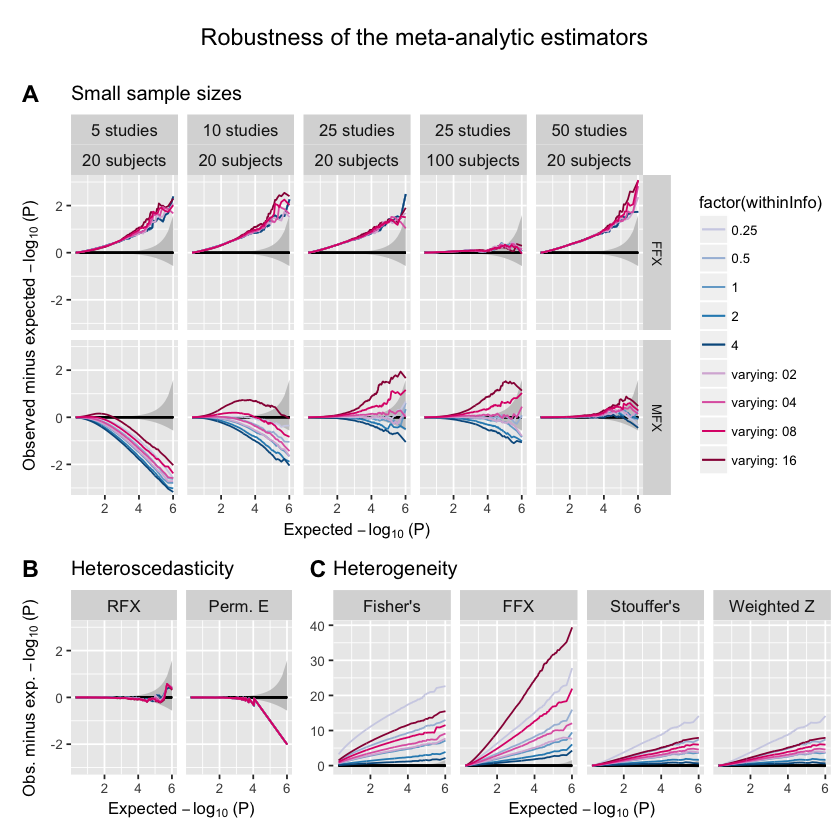

In [66]:
robutness_plot <- function(data){
    data_positive_z <- subset(
        data, is.finite(expectedz) & expectedz>0 & (unitMism=="nominal"))#  &  methods %in% con_methods)
    
    large_sample_assumptions_methods <- c("megaMFX","megaFFX_FSL")
    homoscedasticity_assumptions_methods <- c("megaRFX","permutCon")
    homogeneity_assumptions_methods <- c("megaFFX_FSL","fishers", "stouffers", "weightedZ")

    
    data_under_rfx_assumption <- subset(data_positive_z, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") & Between==1)  |
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon") & Between ==1) |
     (methods %in% c("fishers") & Between==0) |
     (methods %in% c("stouffers") & Between==0) |
     (methods %in% c("stouffersMFX") & Between==1) |     
     (methods %in% c("weightedZ") & Between==0) |     
     (methods %in% c("permutZ") & Between==1)    
    ) )
        
#     ooo<-(subset(data_under_rfx_assumption, methods %in% large_sample_assumptions_methods))
#     return(ooo)
    
    p1 <- plot_qq_p(
    list(subset(data_under_rfx_assumption, methods %in% large_sample_assumptions_methods)),
    formula=methods~nStudies+nSubjects, "Small sample sizes", 
    mult=FALSE, lim=1000, filename=NA) + theme(legend.position="none") 

    p2 <- plot_qq_p(
        list(subset(data_under_rfx_assumption, methods %in% homoscedasticity_assumptions_methods &
                   nSubjects==20 & nStudies==25)),
        formula=.~methods, "Heteroscedasticity", 
        mult=FALSE, lim=1000, filename=NA, short=TRUE) + theme(legend.position="none") 

    # # robustness_to <- c(" small_sample"," heterogeneity") #," RFX")
    # robust_to_rfx_data <- subset(allsimudat, is.finite(expectedz) & expectedz>0)#  &  robustness %in% robustness_to)

    # # con_methods <- c("megaMFX","megaMFX2","megaRFX","permutCon", "megaFFX_FSL")
    # # con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

    robust_to_rfx_data <- subset(data_positive_z, (
    #     (methods %in% c("megaMFX") & Between==1) | 
    #      (methods %in% c("megaRFX") & Between==1)  |
         (methods %in% c("megaFFX_FSL") & Between==1) |
    #      (methods %in% c("permutCon") & Between==1) | 
         (methods %in% c("fishers") & Between==1) | 
         (methods %in% c("stouffers") & Between==1)  |
    #      (methods %in% c("stouffersMFX")) |
         (methods %in% c("weightedZ") & Between==1)
    #      (methods %in% c("permutZ"))
        ))

    p3 <- plot_qq_p(
        list(subset(robust_to_rfx_data, nStudies==25 & nSubjects==20 & methods %in% homogeneity_assumptions_methods)), 
        formula=.~methods, 
        title="Heterogeneity", mult=FALSE, lim=NA, filename=NA, short=TRUE) + theme(legend.position="none") 
    
    p1 <- p1 + theme(legend.position="right", plot.title=element_text(size=12), 
                     text=element_text(size=10))
    # scale_x_discrete(labels = c('Female' = expression(alpha),  'Male'   = expression(beta))))
    p2 <- p2 + theme(plot.title=element_text(size=12), text=element_text(size=10))
    p3 <- p3 + theme(plot.title=element_text(size=12), text=element_text(size=10)) + ylab(NULL)

    top_row <- plot_grid(p1, labels = 'A',ncol=1, rel_widths=c(4.5))
   
    if (data$glm[1] == 1){
        # For one-sample tests we have many methods to check against heterogeneity        
        widths = c(0.4, 0.75)
    } else {
        # For two-sample tests we only have one method to check against heterogeneity
        widths = c(0.6, 0.4)
    }
    
    bottom_row <- plot_grid(p2, p3, labels = c('B', 'C'),ncol=2, rel_widths=widths)
    p <- plot_grid(top_row, bottom_row, labels = ' ',ncol=1, rel_heights=c(1.7, 1))
    title <- ggdraw() + draw_label('Robustness of the meta-analytic estimators')
    p <- plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))
    
    # legend <- get_legend(p1 + theme(legend.position="right"))
    # p <- plot_grid(p, legend, ncol = 2, rel_widths = c(1, .2))
    return(p)
}

p <- robutness_plot(allsimudat)

# print on screen
print(p)

# Save to pdf
pdf(paste("robustness.pdf", sep=""))
print(p)
dev.off()

## Two-sample tests

In [67]:
simu2_k05 <- load_data_from_csv('^test2_k005_n20.*_nominal.*', '/Volumes/camille/IBMA_simu/')
simu2_k10 <- load_data_from_csv('^test2_k010_n20.*_nominal.*', '/Volumes/camille/IBMA_simu/')
simu2_k25 <- load_data_from_csv('^test2_k025_n20.*_nominal.*', '/Volumes/camille/IBMA_simu/')
simu2_k50 <- load_data_from_csv('^test2_k050_n20.*_nominal.*', '/Volumes/camille/IBMA_simu/')
# simu2_k25_n100 <- load_data_from_csv('^test2_k025_n100_.*', '/Volumes/camille/IBMA_simu/')

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k005_n20_nominal.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k010_n20_nominal.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k025_n20_nominal.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k050_n20_nominal.csv"


In [68]:
simu2 <- rbind(
                    simu2_k05, 
                    simu2_k10, 
                    simu2_k25, 
                    simu2_k50
#                     simu2_k25_n100
)

# Plot versus number of studies per group rather than total number of studies
simu2$nStudies <- simu2$nStudies/2

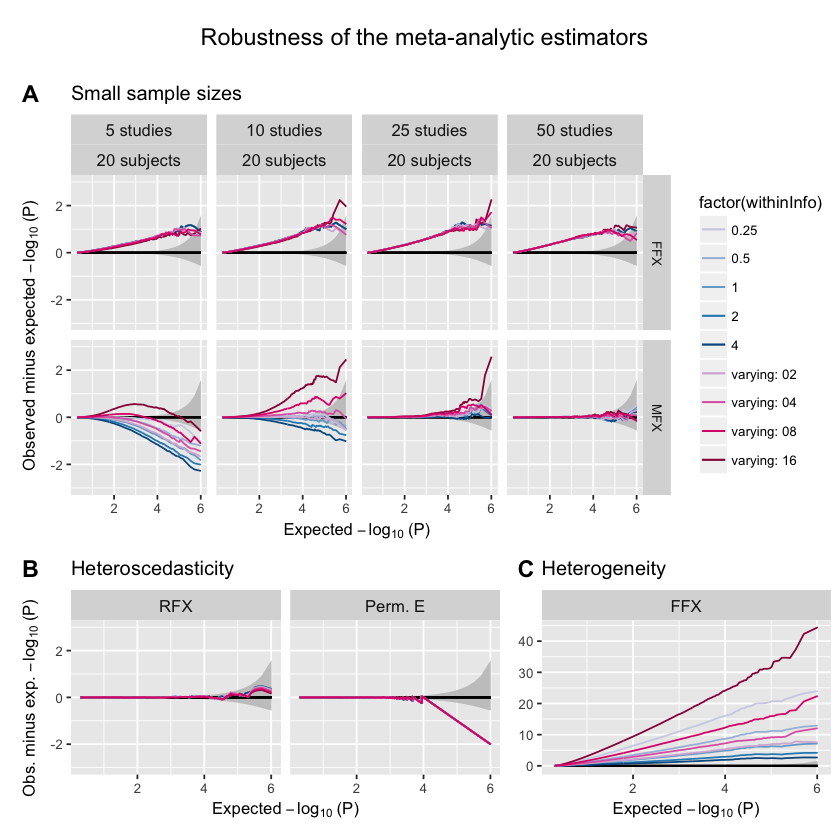

In [69]:
p <- robutness_plot(simu2)

# print on screen
print(p)


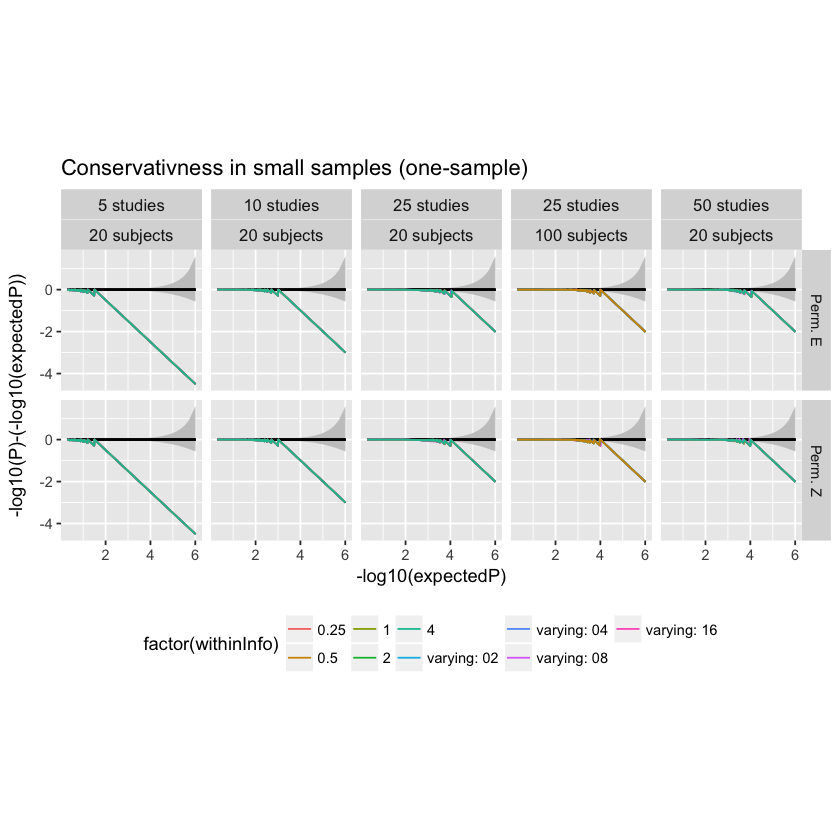

In [30]:
possibly_conservative_methods <- c("permutCon","permutZ")
p <- plot_qq_p(
    list(subset(data_under_rfx_assumption, methods %in% possibly_conservative_methods)), 
    formula=methods~nStudies+nSubjects, "Conservativness in small samples (one-sample)",
    mult=FALSE, lim=NA, filename=NA)
    

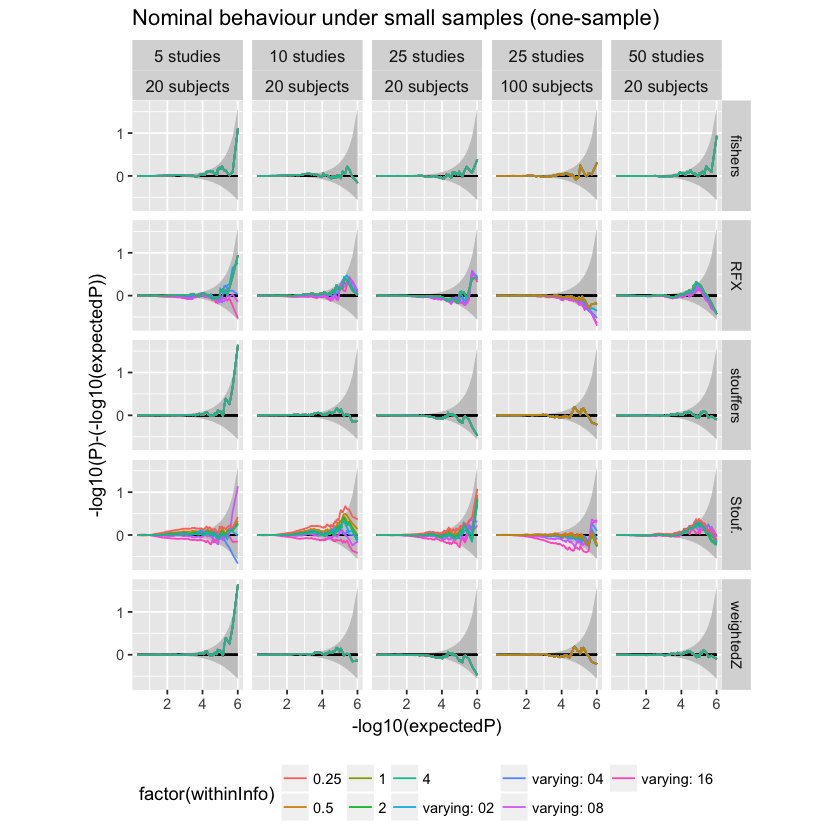

In [79]:
other_methods <- setdiff(unique(allsimudat$methods), 
                         union(large_sample_assumptions_methods, possibly_conservative_methods))
p <- plot_qq_p(
    list(subset(data_under_rfx_assumption, methods %in% other_methods)), 
    formula=methods~nStudies+nSubjects, "Nominal behaviour under small samples (one-sample)", 
    mult=FALSE, lim=NA, filename=NA)

## Two-sample tests

### Load data from CSV

In [6]:
allsimudat2_k05 <- load_data_from_csv('^test2_k005.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_k25_n20 <- load_data_from_csv('^test2_k025_n20.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_k50 <- load_data_from_csv('^test2_k050.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_k25_n100 <- load_data_from_csv('^test2_k025_n100_.*', '/Volumes/camille/IBMA_simu/')

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k005.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k025_n20.csv"
[1] "pattern= test2_k050"
[1] "CSV file /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k050.csv  not found, reprocessing the data."
[1] "^test2_k050.*"
[1] "19 simulations"
[1] "Reading  19  /  19"
[1] "/Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft50_002/simu_400.csv"
[1] "/!  /Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft50_002/simu_400.csv does not exist."
[1] "Reading  18  /  19"
[1] "/Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft20_002/simu_400.csv"
[1] "/!  /Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft20_002/simu_400.csv does not exist."
[1] "Reading  17  /  19"
[1] "/Volumes/camille/IBMA_simu//test2_k050_n20_btw0

Warning message in file(file, "rt"):
“cannot open file '/Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k050.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
allsimudat2 <- rbind(
                    allsimudat2_k05, 
                    allsimudat2_k25_n20, 
                    allsimudat2_k25_n100,
                    allsimudat2_k50
)

In [ ]:
z_methods <- c("fishers", "stouffers", "stouffersMFX", "weightedZ", "permutZ")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% z_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("fishers") & Between==0) | 
     (methods %in% c("stouffers") & Between==0)  |
     (methods %in% c("stouffersMFX") & Between==1)  |
     (methods %in% c("weightedZ") & Between==0) |
     (methods %in% c("permutZ") & Between==1)
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

In [ ]:
z_methods <- c("fishers", "stouffers", "stouffersMFX", "weightedZ", "permutZ")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% z_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("fishers") & Between==1) | 
     (methods %in% c("stouffers") & Between==1)  |
     (methods %in% c("stouffersMFX") & Between==1)  |
     (methods %in% c("weightedZ") & Between==1) |
     (methods %in% c("permutZ") & Between==1)
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

In [ ]:
unique(allsimudat$methods)